<a href="https://colab.research.google.com/github/redouanelg/AppliedMathsInDarija/blob/master/Darija_notebooks/%D8%A7%D9%86%D8%AD%D8%AF%D8%A7%D8%B1_%D8%AE%D8%B7%D9%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade arabic-reshaper python-bidi

Requirement already up-to-date: arabic-reshaper in /usr/local/lib/python3.6/dist-packages (2.0.15)
Requirement already up-to-date: python-bidi in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### <div dir="rtl">هدف دفتر جوبيتير هذا هو تمرين انحدار خطي Linear Regression على بيانات خاصة بمرضى السكري </div>


<div dir="rtl">

الهدف هنا هو تشوف كيفاش الانحدار الخطي كايرسم بحال خط كايحاول يقرب من ڭاع البيانات <br>
في المثال اللي عاناخدو عانشوفو عا متغير واحد اللي هو مؤشر كتلة الجسم body mass index ونشوفو علاقتو بالقياس الكمي لتقدم المرض بعد عام واحد  
<br>
  كتب بواسطة رضوان لكنسات، مستوحى من امثلة Scikit-learn  
</div>

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 

## <div dir="rtl"> الانحدار الخطي</div>

<div dir="rtl">
فهاذ المثال عانتيليشارجيو البيانات `diabetes` ديال scikit-learn و عاناخدو عا معلومة مؤشر كتلة الجسم (bmi) كمتغير للدخول input 
</div>


In [0]:
Data = datasets.load_diabetes()

In [4]:
Data

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [0]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature (bmi)
diabetes_X = diabetes_X[:, np.newaxis, 2]

<div dir="rtl">
هنا عانقسمو البيانات: <br>
نقط البيانات كلها إلا العشرين الأخيرة عاناخدوها كبيانات ديال التعلم  Training  و العشرين الاخيرة بيانات التجريب Test</div>

In [0]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


<div dir="rtl">
تمرين انحدار خطي


In [7]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div dir="rtl">
هنا عانطبقو الانحدار الخطي اللي تعلمنا على بيانات التجريب

In [0]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [9]:
regr.coef_

array([938.23786125])

In [10]:
# The coefficients
print('المعاملات:', regr.coef_, regr.intercept_)
# The mean squared error
print('خطأ تربيعي متوسط: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('معامل التحديد: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

المعاملات: [938.23786125] 152.91886182616167
خطأ تربيعي متوسط: 2548.07
معامل التحديد: 0.47


<div dir="rtl">
نرسمو دابا الدالة الخطية اللي لقاها لينا الانحدار الخطي، و نحطوها على بيانات التجريب

In [0]:
import arabic_reshaper
from bidi.algorithm import get_display

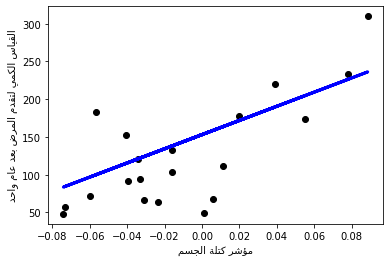

In [12]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel(get_display(arabic_reshaper.reshape('مؤشر كتلة الجسم')))
plt.ylabel(get_display(arabic_reshaper.reshape('القياس الكمي لتقدم المرض بعد عام واحد')))
#plt.xticks(())
#plt.yticks(())
plt.show()